In [264]:
import os
import pandas as pd
import psycopg2
import matplotlib as plt
import numpy as np
import datetime
import seaborn as sns
import statsmodels.api as sm


def make_csv(query, filename):

    # check if file already exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        return df
    # ensure all columns are displayed when viewing a pandas dataframe
    pd.set_option('display.max_columns', None)

    # Creating a connection to the database
    print("creating conecction...")
    con = psycopg2.connect(database="mid_term_project", 
                           user="lhl_student", 
                           password="lhl_student", 
                           host="lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com", 
                           port="5432")


    # creating a cursor object
    cur = con.cursor()
    # running an sql query
    print("running query...")
    cur.execute(query)
    # Storing the result
    rows = cur.fetchall()
    cols = [desc[0] for desc in cur.description]

    con.close()

    # writing the csv file
    print("writing file...")
    df = pd.DataFrame(rows, columns=cols)
    df.to_csv(filename, index=False)

    print('Done')

    return df

In [173]:
make_csv("SELECT * FROM flights ORDER BY RANDOM() LIMIT 100000", "flight.csv")
make_csv("SELECT * FROM passengers ORDER BY RANDOM() LIMIT 100000", "passenger.csv")
make_csv("SELECT * FROM fuel_comsumption ORDER BY RANDOM() LIMIT 100000", "fuel_comsumption.csv")

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,8,20402.0,GL,GL,Miami Air International,2,0.0,0.0,0.0,0.0,0.0,0.0,155249.0,200214.0,355463.0,0.0,0.0,0.0,0.0,0.0,0.0,445174.0,574110.0,1019284.0,2018
1,9,20500.0,G7,G7,GoJet Airlines LLC d/b/a United Express,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
2,5,21492.0,1BQ,1BQ,"Dynamic Airways, LLC",1,0.0,0.0,0.0,0.0,0.0,0.0,221152.0,186732.0,407884.0,0.0,0.0,0.0,0.0,0.0,0.0,350330.0,538432.0,888762.0,2017
3,5,20207.0,XP,XP,XTRA Airways,1,0.0,0.0,0.0,0.0,0.0,0.0,59357.0,259350.0,318707.0,0.0,0.0,0.0,0.0,0.0,0.0,154922.0,676904.0,831826.0,2015
4,10,19977.0,UA,UA,United Air Lines Inc.,3,132234279.0,66488923.0,57018490.0,20978897.0,144486310.0,276720589.0,133758006.0,145149976.0,278907982.0,193065008.0,96695719.0,84147328.0,32197580.0,213040627.0,406105635.0,195620601.0,214063491.0,409684092.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,7,20107.0,FX,FX,Federal Express Corporation,3,58621207.0,12409773.0,19669938.0,2218173.0,34297884.0,92919091.0,59591508.0,34796520.0,94388028.0,93172000.0,21237000.0,36428000.0,3972000.0,61637000.0,154809000.0,94812000.0,62586000.0,157398000.0,2015
3031,2,21161.0,09Q,09Q,"Swift Air, LLC",1,0.0,0.0,0.0,0.0,0.0,0.0,218800.0,109897.0,328697.0,0.0,0.0,0.0,0.0,0.0,0.0,446977.0,226228.0,673205.0,2016
3032,7,21712.0,2HQ,2HQ,Elite Airways LLC,1,166813.0,0.0,0.0,0.0,0.0,166813.0,210465.0,0.0,210465.0,699027.0,0.0,0.0,0.0,0.0,699027.0,866130.0,0.0,866130.0,2018
3033,6,20107.0,FX,FX,Federal Express Corporation,3,59083727.0,12501195.0,21176572.0,2149501.0,35827268.0,94910995.0,60279995.0,36439280.0,96719275.0,82754000.0,18532000.0,32631000.0,3612000.0,54775000.0,137529000.0,84463000.0,55886000.0,140349000.0,2017


In [174]:
df1 = pd.read_csv("flight.csv")
df2 = pd.read_csv('passenger.csv')
df3 = pd.read_csv('fuel_comsumption.csv')
pd.set_option('display.max_columns', None)

In [175]:
df1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-19,WN,WN,WN,5460,WN,N756SA,5460,13198,MCI,"Kansas City, MO",10423,AUS,"Austin, TX",1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,0.0,NaN,0.0,N,110.0,105.0,89.0,1.0,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-07,F9,F9,F9,1673,F9,N705FR,1673,14100,PHL,"Philadelphia, PA",13204,MCO,"Orlando, FL",1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,0.0,NaN,0.0,N,160.0,163.0,130.0,1.0,861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,AA,AA_CODESHARE,AA,4365,AX,N611AE,4365,11278,DCA,"Washington, DC",10868,CAE,"Columbia, SC",1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,0.0,NaN,0.0,N,100.0,87.0,71.0,1.0,408.0,0.0,0.0,0.0,0.0,53.0,NaN,NaN,NaN,NaN
3,2018-01-07,UA,UA_CODESHARE,UA,4410,EV,N14573,4410,14783,SGF,"Springfield, MO",12266,IAH,"Houston, TX",1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,0.0,NaN,0.0,N,117.0,107.0,91.0,1.0,513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-08,DL,DL,DL,2877,DL,N340DN,2877,14869,SLC,"Salt Lake City, UT",14107,PHX,"Phoenix, AZ",820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,0.0,NaN,0.0,N,101.0,93.0,69.0,1.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
data = ['fl_date','mkt_unique_carrier','origin','dest','crs_dep_time','dep_time','crs_arr_time','arr_time','dep_delay','arr_delay','distance','crs_elapsed_time','actual_elapsed_time']
df = df1[data]
#featureEng

In [177]:
def format_hour(x):
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400: x = 0
        x = "{0:04d}".format(int(x))
        hour = datetime.time(int(x[0:2]), int(x[2:4]))
        return hour

In [ ]:
df['dep_time'] = df['dep_time'].apply(format_hour)
df['crs_dep_time'] = df['crs_dep_time'].apply(format_hour)
df['arr_time'] = df['arr_time'].apply(format_hour)
df['crs_arr_time'] = df['crs_arr_time'].apply(format_hour)

In [263]:
df

,date,airline,origin,dest,scheduled_dep_time,dep_time,scheduled_arr_time,arr_time,dep_delay,arr_delay,distance,scheduled_elapsed_time,actual_elapsed_time,delay_level
0,2019-05-19,WN,MCI,AUS,11:10:00,11:06:00,13:00:00,12:51:00,-4.0,-9.0,650.0,110.0,105.0,0
1,2018-04-07,F9,PHL,MCO,15:33:00,15:23:00,18:13:00,18:06:00,-10.0,-7.0,861.0,160.0,163.0,0
2,2018-01-01,AA,DCA,CAE,13:59:00,15:05:00,15:39:00,16:32:00,66.0,53.0,408.0,100.0,87.0,2
3,2018-01-07,UA,SGF,IAH,14:13:00,14:24:00,16:10:00,16:11:00,11.0,1.0,513.0,117.0,107.0,1
4,2019-05-08,DL,SLC,PHX,08:20:00,08:16:00,09:01:00,08:49:00,-4.0,-12.0,507.0,101.0,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-03-14,WN,TUS,MDW,07:10:00,07:06:00,12:25:00,12:15:00,-4.0,-10.0,1440.0,195.0,189.0,0
99996,2018-02-28,WN,ALB,MCO,14:40:00,14:46:00,17:45:00,17:25:00,6.0,-20.0,1073.0,185.0,159.0,1
99997,2018-03-17,AA,LAS,CLT,23:00:00,23:43:00,06:06:00,06:23:00,43.0,17.0,1916.0,246.0,220.0,1
99998,2018-09-09,DL,ATL,LAX,20:08:00,20:06:00,21:50:00,21:40:00,-2.0,-10.0,1947.0,282.0,274.0,0


In [ ]:
df.rename(columns = {'fl_date':'date', 'crs_dep_time':'scheduled_dep_time', 'crs_arr_time':'scheduled_arr_time','crs_elapsed_time':'scheduled_elapsed_time','mkt_unique_carrier':'airline'}, inplace = True)

In [ ]:
df = df.dropna()
df

In [196]:
def get_stat(group): #function to get stats - x.describe() does not work well 
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [ ]:
carrier = 'AA' #Finding AA's delay stats in different airports | using header() to get the statistics for 5 only
check_airports = df[(df['airline'] == carrier)]['dep_delay'].groupby(
                         df['origin']).apply(get_stat).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports.head()

In [ ]:
us_stats = df['dep_delay'].groupby(df['airline']).apply(get_stat).unstack()
us_stats = us_stats.sort_values('count')
us_stats

In [225]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['delay_level'] = df['dep_delay'].apply(delay_type)

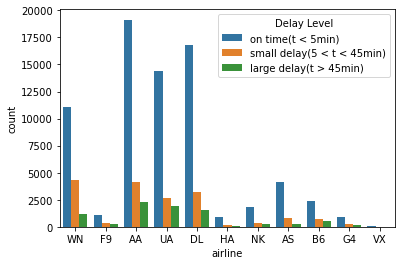

In [258]:
#Delay Counts by airport
gra = sns.countplot(x = 'airline', hue = 'delay_level',data = df)
gra.legend(title='Delay Level', loc='upper right', labels=['on time(t < 5min)', 'small delay(5 < t < 45min)','large delay(t > 45min)'])


In [307]:
df10

,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,11.0,5.0,-9.0,110.0,105.0,89.0,650.0
1,14.0,19.0,-7.0,160.0,163.0,130.0,861.0
2,13.0,3.0,53.0,100.0,87.0,71.0,408.0
3,10.0,6.0,1.0,117.0,107.0,91.0,513.0
4,19.0,5.0,-12.0,101.0,93.0,69.0,507.0
...,...,...,...,...,...,...,...
99995,8.0,5.0,-10.0,195.0,189.0,176.0,1440.0
99996,12.0,5.0,-20.0,185.0,159.0,142.0,1073.0
99997,11.0,3.0,17.0,246.0,220.0,206.0,1916.0
99998,12.0,8.0,-10.0,282.0,274.0,254.0,1947.0


In [319]:
#df['taxi_in'] = df10['taxi_in']
df['taxi_out'] = df10['taxi_out']
df['air_time'] = df10['air_time']
df = df.dropna()
df


/var/folders/x3/jv8gc_ln2_qgkg2mcy722mlh0000gn/T/ipykernel_95769/3572673839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taxi_out'] = df10['taxi_out']
/var/folders/x3/jv8gc_ln2_qgkg2mcy722mlh0000gn/T/ipykernel_95769/3572673839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_time'] = df10['air_time']


,date,airline,origin,dest,scheduled_dep_time,dep_time,scheduled_arr_time,arr_time,dep_delay,arr_delay,distance,scheduled_elapsed_time,actual_elapsed_time,delay_level,taxi_in,taxi_out,air_time
0,2019-05-19,WN,MCI,AUS,11:10:00,11:06:00,13:00:00,12:51:00,-4.0,-9.0,650.0,110.0,105.0,0,5.0,11.0,89.0
1,2018-04-07,F9,PHL,MCO,15:33:00,15:23:00,18:13:00,18:06:00,-10.0,-7.0,861.0,160.0,163.0,0,19.0,14.0,130.0
2,2018-01-01,AA,DCA,CAE,13:59:00,15:05:00,15:39:00,16:32:00,66.0,53.0,408.0,100.0,87.0,2,3.0,13.0,71.0
3,2018-01-07,UA,SGF,IAH,14:13:00,14:24:00,16:10:00,16:11:00,11.0,1.0,513.0,117.0,107.0,1,6.0,10.0,91.0
4,2019-05-08,DL,SLC,PHX,08:20:00,08:16:00,09:01:00,08:49:00,-4.0,-12.0,507.0,101.0,93.0,0,5.0,19.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-03-14,WN,TUS,MDW,07:10:00,07:06:00,12:25:00,12:15:00,-4.0,-10.0,1440.0,195.0,189.0,0,5.0,8.0,176.0
99996,2018-02-28,WN,ALB,MCO,14:40:00,14:46:00,17:45:00,17:25:00,6.0,-20.0,1073.0,185.0,159.0,1,5.0,12.0,142.0
99997,2018-03-17,AA,LAS,CLT,23:00:00,23:43:00,06:06:00,06:23:00,43.0,17.0,1916.0,246.0,220.0,1,3.0,11.0,206.0
99998,2018-09-09,DL,ATL,LAX,20:08:00,20:06:00,21:50:00,21:40:00,-2.0,-10.0,1947.0,282.0,274.0,0,8.0,12.0,254.0


In [330]:

X = df[
    ['air_time','distance','scheduled_elapsed_time','actual_elapsed_time','taxi_in','taxi_out']
]
y = df['arr_delay']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2058.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        19:54:26   Log-Likelihood:            -5.1679e+05
No. Observations:               98006   AIC:                         1.034e+06
Df Residuals:                   98000   BIC:                         1.034e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1